# Genomic information

to calculate the mutation pr. Mbp for each individual, we need to find the read-length of each pannel. This can be done by looking at the genomic information, and each sequence assays start- and end position. Since we are not interested in introns, each gene can have multiple start and end positions. For each panel, we erefre have to find the length of each segment, and simply sum over it.

In [19]:
library('ggplot2')
library('dplyr')

## Loading the data

In [20]:
genomic_inf <- read.table("../../data/genie_v15/genomic_information.txt", sep="\t", quote="", head=TRUE)
dim(genomic_inf)
head(genomic_inf)

[1] 9211709       9

,Chromosome,Start_Position,End_Position,Hugo_Symbol,ID,SEQ_ASSAY_ID,Feature_Type,includeInPanel,clinicalReported
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,9,133738302,133738491,ABL1,ABL1,UHN-48-V1,exon,True,
2,9,133747476,133747664,ABL1,ABL1,UHN-48-V1,exon,True,
3,9,133748157,133748327,ABL1,ABL1,UHN-48-V1,exon,True,
4,9,133748277,133748457,ABL1,ABL1,UHN-48-V1,exon,True,
5,9,133750328,133750516,ABL1,ABL1,UHN-48-V1,exon,True,
6,14,105246429,105246600,AKT1,AKT1,UHN-48-V1,exon,True,


## Creating the table

In [21]:
table(genomic_inf$includeInPanel)

# We are only interested in the ranges of genes that are included in each panel
genomic_inf <- genomic_inf[which(genomic_inf$includeInPanel=='True'), ]

# checking if it worked
table(genomic_inf$includeInPanel)

# Limiting the table to columns of interest
genomic_inf <- genomic_inf[, c('SEQ_ASSAY_ID', 'Start_Position', 'End_Position')]

# Calculating the length
genomic_inf$length <- genomic_inf$End_Position - genomic_inf$Start_Position

# Checking the new table
dim(genomic_inf)
head(genomic_inf)


  False    True 
3390930 5820779 


   True 
5820779 

[1] 5820779       4

,SEQ_ASSAY_ID,Start_Position,End_Position,length
,<chr>,<int>,<int>,<int>
1,UHN-48-V1,133738302,133738491,189
2,UHN-48-V1,133747476,133747664,188
3,UHN-48-V1,133748157,133748327,170
4,UHN-48-V1,133748277,133748457,180
5,UHN-48-V1,133750328,133750516,188
6,UHN-48-V1,105246429,105246600,171


In [22]:
panel_length_table <- data.frame(Assay_ID=character(),
                               length_in_bp=numeric()
                              )

for (panel in unique(genomic_inf$SEQ_ASSAY_ID)) {
    
    panel_inf <- genomic_inf[which(genomic_inf$SEQ_ASSAY_ID==panel),]
    
    idx <- nrow(panel_length_table)+1
        
    panel_length_table[idx, 1] <- panel
    panel_length_table[idx, 2] <- sum(panel_inf$length)
}

# Checking the new table
dim(panel_length_table)
head(panel_length_table)

[1] 112   2

,Assay_ID,length_in_bp
,<chr>,<dbl>
1,UHN-48-V1,529200
2,UHN-50-V2,308378
3,GRCC-CHP2,330405
4,GRCC-CP1,332685
5,GRCC-MOSC3,2276205
6,NKI-TSACP-MISEQ-NGS,567000


[1] 13  2

Assay_ID,length_in_bp
<chr>,<dbl>
WAKE-CA-NGSQ3,0
WAKE-CLINICAL-R2D2,0
WAKE-CLINICAL-T5A,0
WAKE-CLINICAL-T7,0
WAKE-CA-01,0
WAKE-CLINICAL-DX1,0
WAKE-CLINICAL-AB2,0
WAKE-CLINICAL-AB3,0
WAKE-CLINICAL-AB1,0


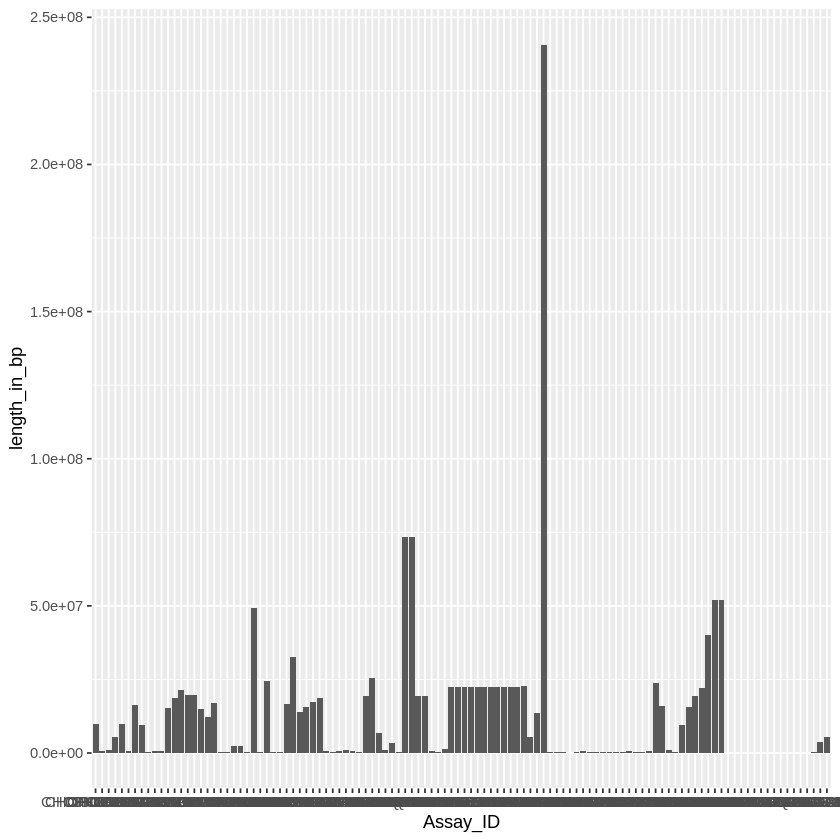

In [23]:
# Visualizing the pael lengths
ggplot(panel_length_table, aes(x=Assay_ID, y=length_in_bp)) + geom_col()

# How many panels have a length of 0, and which ones are they?
blup <- panel_length_table %>% filter(length_in_bp == 0)

dim(blup)
blup

In [24]:
write.csv(panel_length_table, "../../derived_data/genie_v15/panel_length_table.csv", row.names=TRUE)